<a href="https://colab.research.google.com/github/OptimoCX/BootCampIA/blob/main/06_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# YOLO (You Only Look Once) - Solo mira(s) una vez

https://docs.ultralytics.com/es/models/yolov8/

Es un algoritmo de detección de objetos en tiempo real que utiliza redes neuronales convolucionales (CNN) para identificar y localizar múltiples objetos en una imagen o video en una sola pasada, a diferencia de otros métodos que realizan detecciones en varias etapas.

## Características clave de YOLO:

- **Velocidad:** Es muy rápido porque procesa la imagen completa en una sola red neuronal, lo que lo hace ideal para aplicaciones en tiempo real (ej: video vigilancia, automóviles autónomos).

- **Precisión**: Aunque no es el más preciso en todos los casos, logra un buen equilibrio entre velocidad y exactitud.

- **Detección en una pasada**: A diferencia de métodos como R-CNN o Faster R-CNN (que usan regiones propuestas), YOLO divide la imagen en una cuadrícula y predice las cajas delimitadoras (bounding boxes) y clases directamente.

#¿Cómo funciona?:

## COCO: Dataset de Entrenamiento de YOLO

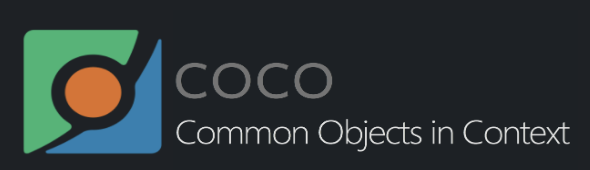

(Objetos Comunes en Contexto)

https://cocodataset.org

Imágenes:

- Train: 118.000 imágenes aprox. Para el entrenamiento del modelo
- Val: 5.000 imágenes aprox. Validación: Para evaluar el modelo durante el entrenamiento para ajustar hiperparámetros, detectar overfitting o decidir cuándo detener el entrenamiento
- Test: 41.000 imágenes aprox (sin anotaciones públicas). Probar el modelo una vez finalizado el entrenamiento, simulando un escenario real donde no se conocen las respuestas.

**¿Por qué no tienen anotaciones públicas?**
Para evitar que los investigadores ajusten sus modelos a este conjunto (lo que invalidaría la evaluación objetiva)



## Algoritmo

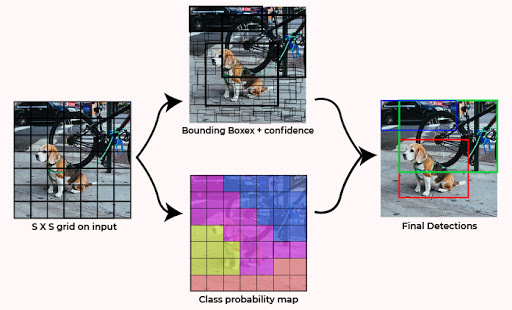

## 1. Divide la imagen en una cuadrícula (ej: 13x13, 20x20)

  - Esta división no siempre es de 13x13 o 20x20. La división es flexible dependiendo la versión de Yolo y la entrada (imagen o video)
  - No es lo mismo que un Kernel
  - Yolo decide automáticamente la mejor división de acuerdo a la imagen de entrada. Aunque el desarrollador puede configurarlo manualmente de ser necesario.

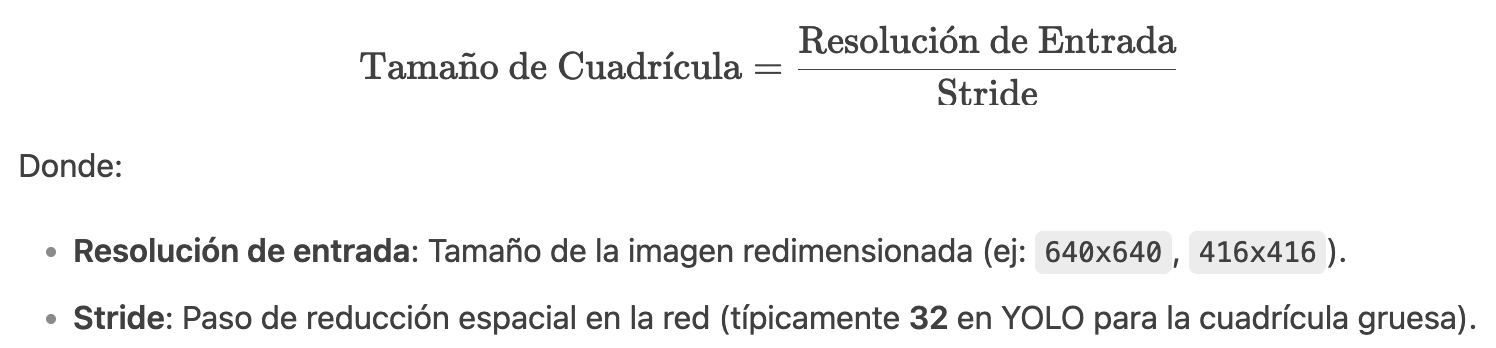

**Ejemplo para una resolución de 640 x 640**

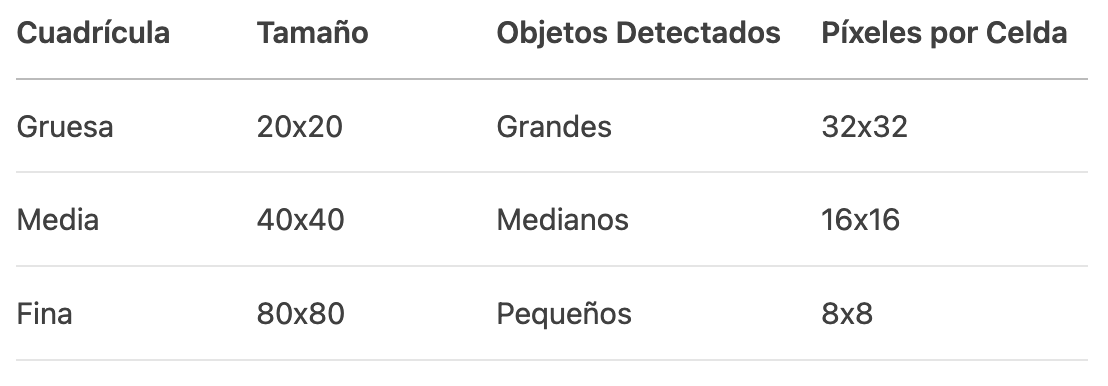

## 2. Para cada celda, predice:
  - Cajas delimitadoras (bounding boxes).
  - Puntuación de confianza (probabilidad de que haya un objeto).
  - Clases de objetos (ej: "perro", "coche").

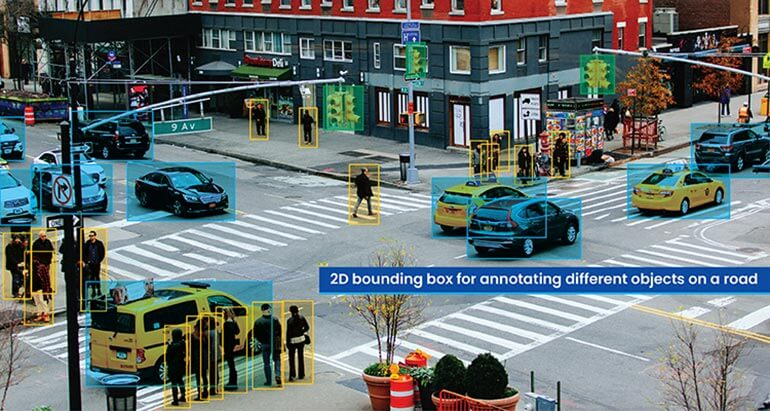

Una bounding box es un rectángulo definido por:

- Coordenadas del centro (x,y)
- (x,y): Posición del centro de la caja.
- Ancho (width) y alto (height): Dimensiones de la caja.
- Clase del objeto: Ej: "perro", "coche", "persona".
- Confianza: Probabilidad de que la caja contenga un objeto válido.

## 3. Filtra las detecciones con baja confianza y aplica supresión de no máximos (Non-Max Suppression, NMS) para eliminar solapamientos.

- Filtrado por Confianza: Descarta todas las bounding boxes cuya probabilidad de contener un objeto (objectness score) sea menor a un umbral (ej: 0.5)
- Supresión de No Máximos (NMS): Elimina cajas duplicadas que detectan el mismo objeto, conservando solo la más precisa

# Arquitetura YOLO v8

https://yolov8.org/what-is-yolov8/

- 53 Bloques Convolucionales (con varias capas internas)

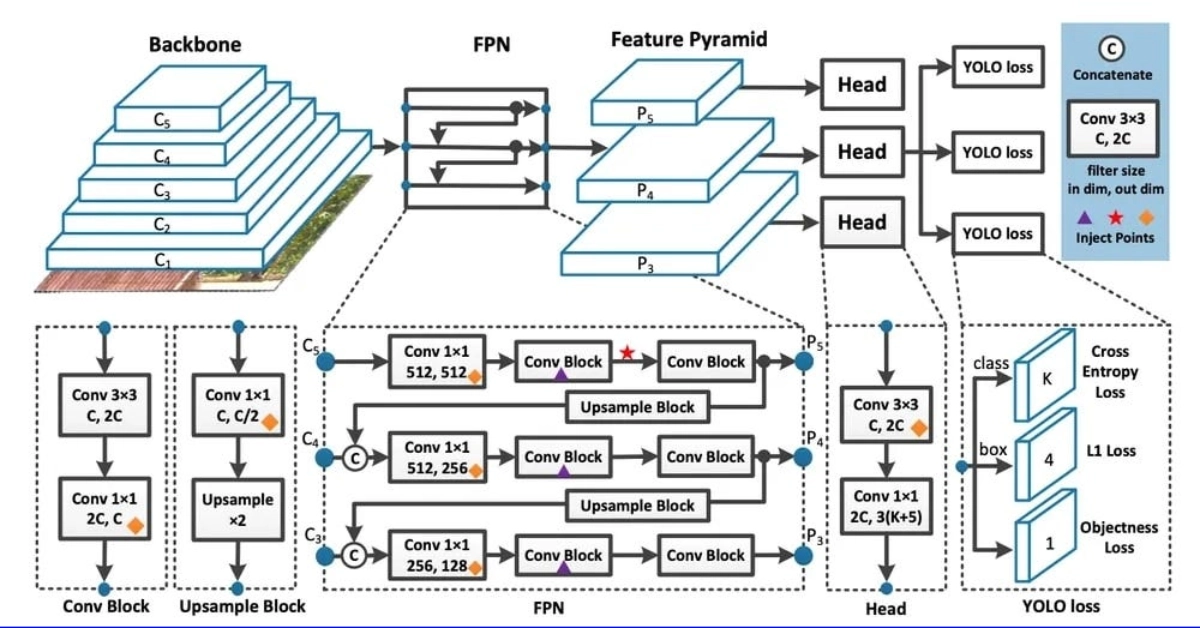

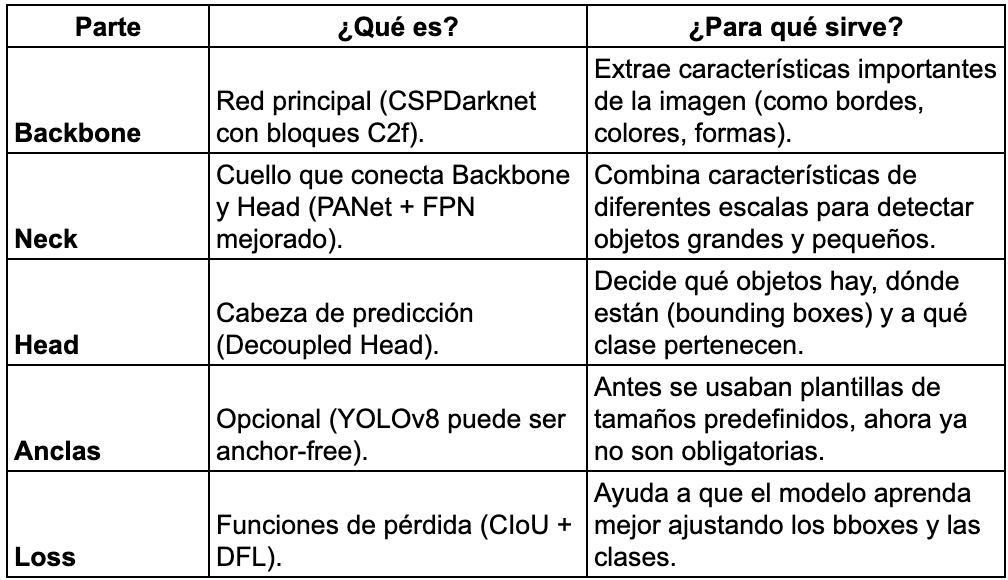

In [ ]:
pip install ultralytics opencv-python matplotlib

In [ ]:
from ultralytics import YOLO
import cv2 # OpenCV para procesamiento de imágenes. Casi siempre se usa con YOLO https://opencv.org/
import matplotlib.pyplot as plt

In [ ]:
model = YOLO("yolov8x.pt")  # Versión 8 - Versión más estable y completa X: extra large
# Versión más liviana "nano" yolov8n.pt

In [ ]:
# Descargar imagen de ejemplo (tráfico)
!wget -O traffic.jpg "https://images.unsplash.com/photo-1597762333765-cbcd63dd8acc?q=80&w=2824&auto=format&fit=crop&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

# Mostrar la imagen
img = cv2.imread("traffic.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir a RGB para matplotlib
plt.figure(figsize=(8, 8))
plt.imshow(img_rgb)
plt.axis("off")
plt.title("Imagen Original - Tráfico")
plt.show()

In [ ]:
# Realizar detección
results = model(img_rgb)

# Mostrar resultados (con cajas delimitadoras - bounding boxes)
annotated_img = results[0].plot()  # Imagen con las detecciones dibujadas
plt.figure(figsize=(8, 8))
plt.imshow(annotated_img)
plt.axis("off")
plt.title("Detección de Objetos con YOLOv8")
plt.show()

In [ ]:
# Obtener las predicciones
boxes = results[0].boxes
print(f"Objetos detectados: {len(boxes)}")

# Mostrar las clases detectadas
for box in boxes:
    class_id = int(box.cls)
    class_name = model.names[class_id]
    confidence = float(box.conf)
    print(f"- {class_name} (Confianza: {confidence:.2f})")

# Procesamiento de Videos

**Frame**: Un frame (o fotograma) en un video es una imagen individual dentro de una secuencia de imágenes que, al reproducirse en rápida sucesión, crean la ilusión de movimiento.

**Características clave:**
- **Unidad básica del video**: Cada frame es como una foto estática que, al combinarse con otros frames, forma el video completo.

- **Tasa de frames por segundo (FPS/Hz)**: La fluidez del video depende de cuántos frames se muestran por segundo (ejemplo: 24 FPS en cine, 30/60 FPS en TV y videos digitales).

- **Resolución**: Se refiere al número de píxeles que componen el frame (ejemplo: 1920x1080 en Full HD).

- **Formato de almacenamiento**: Los frames pueden guardarse en formatos como JPEG (en videos sin compresión) o comprimirse en formatos como MP4, AVI, etc.

In [ ]:
import cv2
from ultralytics import YOLO
import time
from google.colab.patches import cv2_imshow

# 1. Configuración inicial
VIDEO_PATH = "Vehicle Dataset Sample 2 - Anuj Khandelwal (360p, h264).mp4"
MODEL_TYPE = "yolov8x.pt"
CLASSES = [2, 3, 5, 7]              # Coche, Moto, Autobús, Camión
# https://github.com/ultralytics/ultralytics/blob/main/ultralytics/cfg/datasets/coco.yaml
# Si quiero que detecte todas las clases simplemente elimino la línea anterior
CONFIDENCE = 0.5                     # Umbral de confianza (0-1)

# 2. Cargar el modelo YOLOv8
model = YOLO(MODEL_TYPE)

# 3. Abrir el video
cap = cv2.VideoCapture(VIDEO_PATH)
if not cap.isOpened():
    print("❌ Error al abrir el video")
    exit()

# 4. Procesar cada frame
frame_count = 0
max_frames_to_show = 60  # Límite de frames a mostrar (evita sobrecarga)

while cap.isOpened() and frame_count < max_frames_to_show:
    start_time = time.time()

    ret, frame = cap.read()
    if not ret:
        break

    # Detección con YOLOv8
    results = model(frame, classes=CLASSES, conf=CONFIDENCE, verbose=False)

    # Dibujar resultados
    annotated_frame = results[0].plot()

    # Mostrar el resultado
    cv2_imshow(annotated_frame)  # Usamos cv2_imshow en lugar de cv2.imshow
    frame_count += 1

    # Pequeña pausa para visualización
    time.sleep(0.1)

# 5. Liberar recursos
cap.release()
print(f"✅ Procesamiento completado. Mostrados {frame_count} frames")

# Ejemplo con WebCam (Ejecutar en VScode)

In [ ]:
# Ejemplo con Webcam
# Probar en VScode (localmente)

import cv2
from ultralytics import YOLO

# Cargar modelo YOLOv8n (el más ligero)
model = YOLO("yolov8n.pt")

# Iniciar cámara (0 = cámara predeterminada)
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Detección con YOLO
    results = model(frame)
    annotated_frame = results[0].plot()  # Dibuja bounding boxes

    # Mostrar el resultado
    cv2.imshow("YOLOv8 - Detección en tiempo real", annotated_frame)

    # Salir con 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Liberar recursos
cap.release()
cv2.destroyAllWindows()